<a href="https://colab.research.google.com/github/billyfazairawan/UAS/blob/main/UAS_22_11_5330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [4]:
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path, sep=';')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes PedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
0,2,138,62,35,0,33.6,0.127,47,1,NaN,NaN
1,0,84,82,31,125,38.2,0.233,23,0,NaN,NaN
2,0,145,0,0,0,44.2,0.630,31,1,NaN,NaN
3,0,135,68,42,250,42.3,0.365,24,1,NaN,NaN
4,1,139,62,41,480,40.7,0.536,21,0,NaN,NaN


In [5]:
if 'Unnamed: 9' in data.columns and 'Unnamed: 10' in data.columns:
    data = data.drop(columns=['Unnamed: 9', 'Unnamed: 10'])

In [6]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pregnancies                2000 non-null   int64  
 1   Glucose                    2000 non-null   int64  
 2   BloodPressure              2000 non-null   int64  
 3   SkinThickness              2000 non-null   int64  
 4   Insulin                    2000 non-null   int64  
 5   BMI                        2000 non-null   float64
 6   Diabetes PedigreeFunction  2000 non-null   float64
 7   Age                        2000 non-null   int64  
 8   Outcome                    2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [7]:
print("\nFirst Few Rows of Cleaned Dataset:")
print(data.head())


First Few Rows of Cleaned Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   Diabetes PedigreeFunction  Age  Outcome  
0                      0.127   47        1  
1                      0.233   23        0  
2                      0.630   31        1  
3                      0.365   24        1  
4                      0.536   21        0  


In [8]:
data_description = data.describe()
print("\nSummary Statistics:")
print(data_description)


Summary Statistics:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  Diabetes PedigreeFunction          Age      Outcome  
count  2000.000000                2000.000000  2000.000000  2000.000000  
mean     32.193000                   0.470930    33.090500     0.342000  
std       8.149901                   0.323553    11.78

In [9]:
zero_values = (data == 0).sum()
print("\nZero Values in Each Column:")
print(zero_values)


Zero Values in Each Column:
Pregnancies                   301
Glucose                        13
BloodPressure                  90
SkinThickness                 573
Insulin                       956
BMI                            28
Diabetes PedigreeFunction       0
Age                             0
Outcome                      1316
dtype: int64


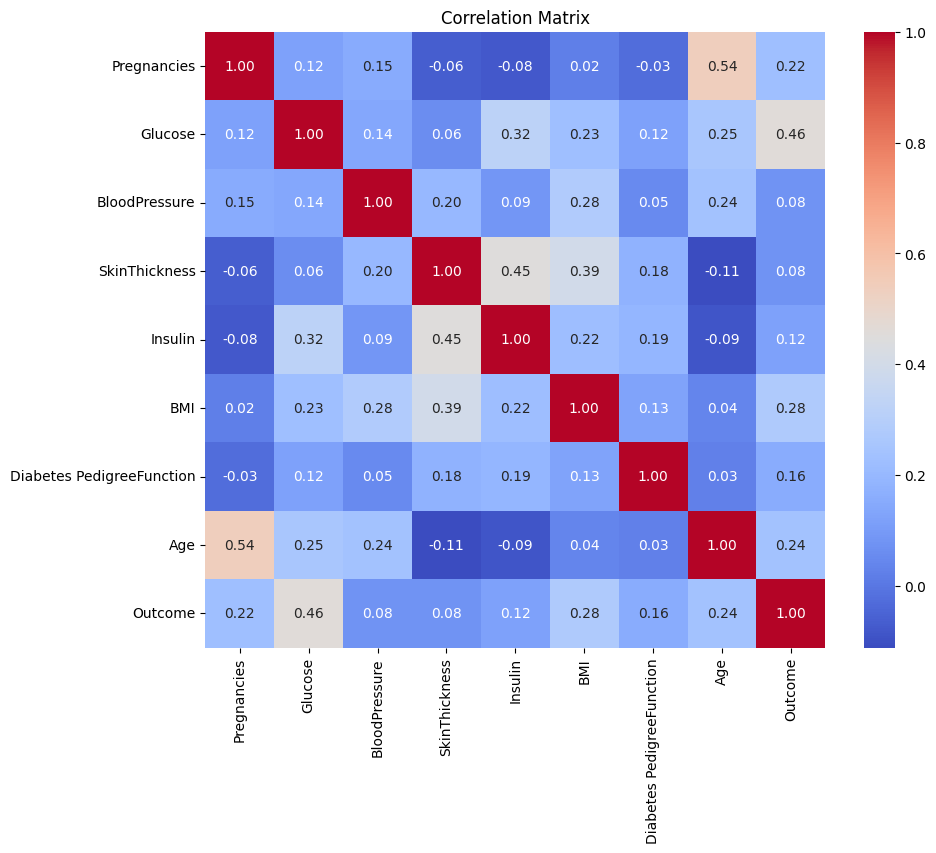

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

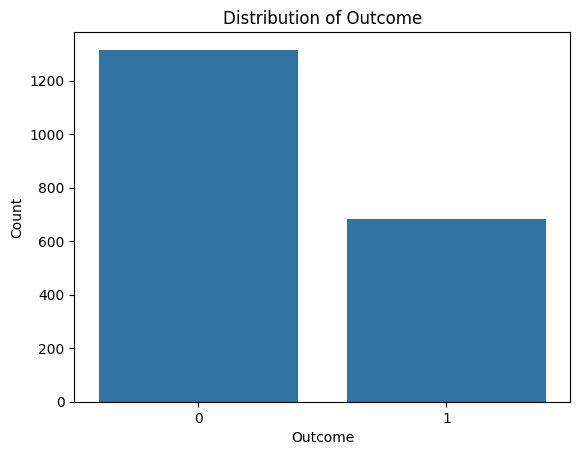

In [11]:
sns.countplot(x='Outcome', data=data)
plt.title("Distribution of Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [12]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_data_summary = data[columns_to_check].replace(0, pd.NA).isna().sum()
print("\nMissing or Zero Values (Treated as NA):")
print(missing_data_summary)


Missing or Zero Values (Treated as NA):
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
dtype: int64


In [13]:
data[columns_to_check] = data[columns_to_check].replace(0, pd.NA)

In [14]:
data.fillna(data.median(), inplace=True)

<ipython-input-14-48d8393c03d4>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.median(), inplace=True)


In [15]:
print("\nMissing Values After Imputation:")
print(data.isna().sum())


Missing Values After Imputation:
Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
Diabetes PedigreeFunction    0
Age                          0
Outcome                      0
dtype: int64


In [16]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


Cross-Validation Scores (5-Fold): [0.771875 0.796875 0.8      0.790625 0.78125 ]
Mean Accuracy from Cross-Validation: 0.7881250000000001

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       253
           1       0.73      0.76      0.74       147

    accuracy                           0.81       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.81      0.81      0.81       400



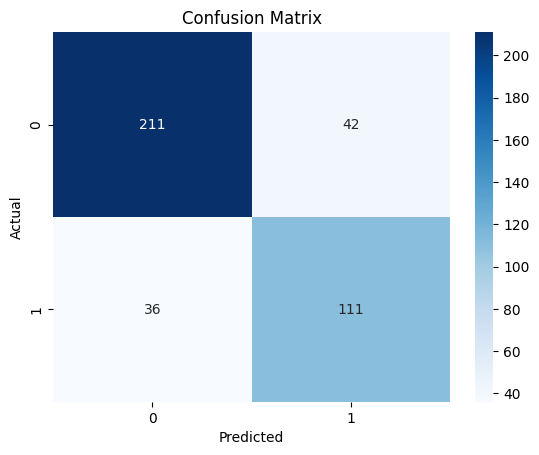

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)

cv_scores = cross_val_score(knn, X_train_selected, y_train, cv=5, scoring='accuracy')

print("\nCross-Validation Scores (5-Fold):", cv_scores)
print("Mean Accuracy from Cross-Validation:", cv_scores.mean())

y_pred = knn.predict(X_test_selected)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

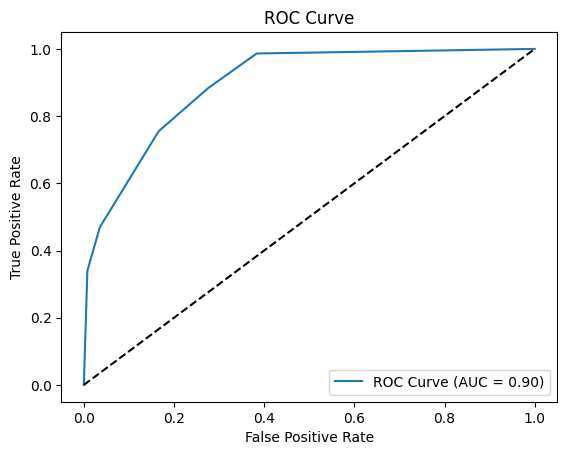

In [20]:
y_pred_proba = knn.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()